In [156]:
'''
    Name: AASHISH KUMAR SAHU
    Dataset: Titanic-Machine Learning from Disaster
    Model: Logistic Regression
    Objective: predicting the survival of passengers
'''

# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [157]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [158]:
'''
training Data preprocessing: 
1. The column Cabin was dropped since it has a lot of missing values
2. the missing values of age feature were filled using the mean of all ages within the dataset
'''

# importing train.csv
file = pd.read_csv("train.csv")
data = pd.DataFrame(file)

# creating new features 
# 1. family size
data["familysize"] = data['Parch'] + data['SibSp']

# 2. fare per person
data["fare_per_person"] = data['Fare']/(data['familysize']+1)

# shuffling the dataset
data.sample(frac=1)

# making numpy arrays of training and output data
train_data = np.array(data[['Pclass', 'gender_int', 'Age', 'Fare', 'familysize']])
label = np.array(data['Survived'])

# m = no. of training examples
m = np.size(label)
print("trainig data:" + str(train_data.shape) + "\n")
print(train_data)

trainig data:(891, 5)

[[  3.       1.      22.       7.25     1.    ]
 [  1.       0.      38.      71.2833   1.    ]
 [  3.       0.      26.       7.925    0.    ]
 ..., 
 [  3.       0.      24.      23.45     3.    ]
 [  1.       1.      26.      30.       0.    ]
 [  3.       1.      32.       7.75     0.    ]]


In [159]:
# scaling the age feature
age_norm = (train_data[:, 2] - np.min(train_data[:, 2]))/(np.max(train_data[:, 2]) - np.min(train_data[:, 2]))

# scaling the fare feature
fare_norm = (train_data[:, 3] - np.min(train_data[:, 3]))/(np.max(train_data[:, 3]) - np.min(train_data[:, 3]))

train_data[:, 2] = age_norm
train_data[:, 3] = fare_norm
print("dataset after feature scaling")
print(train_data)

dataset after feature scaling
[[ 3.          1.          0.27117366  0.01415106  1.        ]
 [ 1.          0.          0.4722292   0.13913574  1.        ]
 [ 3.          0.          0.32143755  0.01546857  0.        ]
 ..., 
 [ 3.          0.          0.2963056   0.04577135  3.        ]
 [ 1.          1.          0.32143755  0.0585561   0.        ]
 [ 3.          1.          0.39683338  0.01512699  0.        ]]


In [160]:
# initialising weights
w = np.zeros(6).reshape(6,1)

# alpha = learning rate
alpha = 0.001

# Lambda = regularisation parameter
Lambda = 0.001

# appending ones vector to the training data which is the intercept or the constant term 
x_new = np.append(np.ones([m, 1], dtype=float), train_data, axis=1)
label = label.reshape(m, 1)

cost after convergence: 0.469226137423


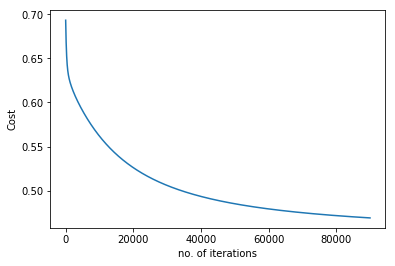

In [161]:
# lists for storing costs and no. of iterations
j_list = []
it = []

# gradient descent
for i in range(90000):
    # calculating hypothesis function
    h = sigmoid(np.dot(x_new, w))
    
    # gradient step
    w[0] = w[0] - (alpha/m) * np.dot(x_new[:, 0].T, (h-label))
    w[1:7] = w[1:7] - (alpha/m) * np.dot(x_new[:, 1:7].T, (h-label)) + (Lambda/m) * w[1:7]
    
    # cost calculation
    j = -(1/m) * np.sum(np.dot(label.T, np.log(h)) + np.dot((1-label.T), np.log(1-h)))
    
    j_list.append(j)
    it.append(i)

print("cost after convergence: " + str(j))
  
# potting the cost vs iterations plot
plt.plot(it,j_list, '-')
plt.xlabel("no. of iterations")
plt.ylabel("Cost")
plt.show()

In [179]:
# predictions after training the dataset
h_p = sigmoid(np.dot(x_new, w))

# according to the data only 38% of the total passengers survived, therefore, the threshold 
# for survival should be higher because passengers with probablity less then 0.6 didn't survive
# classification for threshold = 0.6
p = np.zeros([m, 1])
for i in range(m):
    if h_p[i] >= 0.6:
        p[i] = 1

# accuracy calculation
Sum = 0
for i in range(m):
    if p[i] == label[i]:
        Sum+=1
        
accuracy = (Sum / m) * 100
print("Accuracy on training set: ", end = "")
print("%.2f" % accuracy, end = "")
print("%")

########################################### THE END  ##########################################  

Accuracy on training set: 80.70%
